Goal is to parse the topics related to end times to see if there are years when they spike.

What are the known concerns for the denomination around end-times? 
+ Catholicism
+ catastropic events
+ government
+ great controversy
+ news and world events
+ prophecy
+ second coming

Topics of interest:

+ worldEvents: [163, 39, 27, 17, 96, 141, 100, 75, 30]
+ theologyEndTimes: [51, 170, 145, 215, 199, 182, 117, 92, 33]
+ prophecy: [45, 6, 130]
+ catholicism: [221, 158]

In [9]:
from matplotlib import pyplot as plt
import matplotlib.ticker as ticker
import os
import pandas as pd
import seaborn as sns

In [135]:
dataDir = "../../data/"
spikesDips = "list_of_topic_spikes_and_dips.csv"
labels = 'TopicLabels.csv'
yearlyAllTopics = 'yearlyTopicalPrevalence.csv'

In [11]:
%matplotlib inline

In [12]:
sd = pd.read_csv(os.path.join(dataDir, spikesDips))
sd[:10]

,Unnamed: 0,topic_id,year,weight,label,encoding
0,42,0,1891,0.013252,Spike,1
1,52,0,1901,0.013959,Spike,1
2,53,0,1902,0.015294,Spike,1
3,59,0,1908,0.016196,Spike,1
4,60,0,1909,0.015288,Spike,1
5,61,0,1910,0.018297,Spike,1
6,62,0,1911,0.019491,Spike,1
7,63,0,1912,0.017961,Spike,1
8,64,0,1913,0.014772,Spike,1
9,66,0,1915,0.012874,Spike,1


In [23]:
topicLabels = pd.read_csv(os.path.join(dataDir, 'TopicLabels.csv'))

In [24]:
topicLabels[:10]

,mallet_topic_id,browser_topic_id,label
0,0,1,Canvassing Work
1,1,2,Recipes
2,2,3,OCR Errors
3,3,4,Suffering and Death
4,4,5,Bible Verses (New Testament)
5,5,6,[unclear] - thing know think way
6,6,7,Prophecy (Daniel) - king daniel babylon lord
7,7,8,OCR Errors 2
8,8,9,Christian Behavior
9,9,10,Report of Meetings


In [25]:
merged = pd.merge(sd, topicLabels, how='left', left_on='topic_id', right_on='mallet_topic_id' )

In [26]:
merged[:10]

,Unnamed: 0,topic_id,year,weight,label_x,encoding,mallet_topic_id,browser_topic_id,label_y
0,42,0,1891,0.013252,Spike,1,0,1,Canvassing Work
1,52,0,1901,0.013959,Spike,1,0,1,Canvassing Work
2,53,0,1902,0.015294,Spike,1,0,1,Canvassing Work
3,59,0,1908,0.016196,Spike,1,0,1,Canvassing Work
4,60,0,1909,0.015288,Spike,1,0,1,Canvassing Work
5,61,0,1910,0.018297,Spike,1,0,1,Canvassing Work
6,62,0,1911,0.019491,Spike,1,0,1,Canvassing Work
7,63,0,1912,0.017961,Spike,1,0,1,Canvassing Work
8,64,0,1913,0.014772,Spike,1,0,1,Canvassing Work
9,66,0,1915,0.012874,Spike,1,0,1,Canvassing Work


In [178]:
import numpy as np

In [205]:
yearlyAll = pd.read_csv(os.path.join(dataDir, yearlyAllTopics), index_col='date').unstack().reset_index()
yearlyAll.columns = ['topic_id', 'year', 'weight']
yearlyAll['topic_id'] = yearlyAll[['topic_id']].apply(pd.to_numeric)

In [206]:
yearlyAll[:10]

,topic_id,year,weight
0,0,1849,0.000465
1,0,1850,0.000748
2,0,1851,0.000167
3,0,1852,0.000158
4,0,1853,0.000158
5,0,1854,0.000353
6,0,1855,0.000284
7,0,1856,0.000356
8,0,1857,0.000114
9,0,1858,0.000206


In [209]:
def plot_topic_subset(df, topic_list):
    filtered = df[(df['topic_id'].isin(topic_list)) & (df['label_x'] == "Spike")]
    sns.lmplot(x="year", y="weight", hue='label_y', data=filtered, fit_reg=False, size=4, aspect=2)
    plt.ylim(0.0, 0.1)
    plt.xlim(1845, 1925)

In [210]:
def plot_all_topic_spikes(df):
    df = df[df['label'] == "Spike"]
    sns.lmplot(x="year", y="weight", hue='topic_id', data=df, fit_reg=False, size=4, aspect=2)
    

In [225]:
def sum_all_topic_values(df, topic_list):
#     filtered = df[(df['topic_id'].isin(topic_list)) & (df['label_x'] == 'Spike')]
    filtered = df[df['topic_id'].isin(topic_list)]
    summed = filtered.groupby('year').agg({'weight': 'sum'}).reset_index()
    sns.set_style("darkgrid")
    summed.plot(x='year', figsize=(9,5))
    plt.ylim(0.0, 0.15)
    plt.xlim(1845, 1925)
#     plt.show()

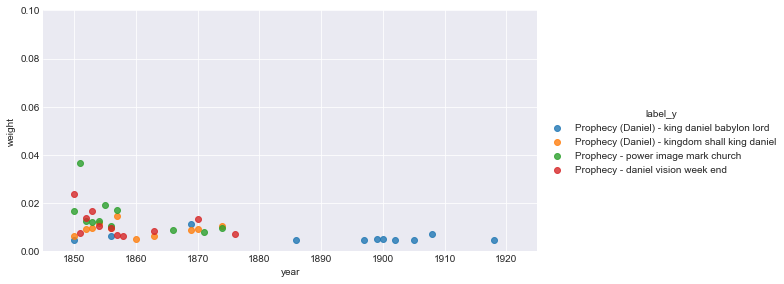

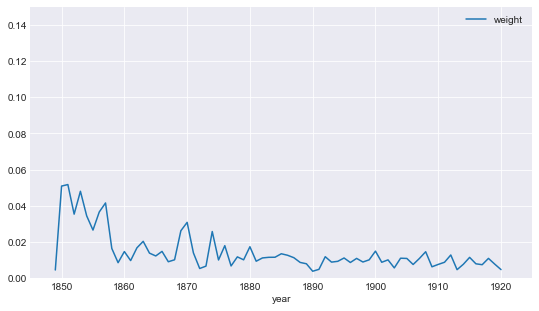

In [226]:
prophecy = [45, 6, 130, 215]
plot_topic_subset(merged, prophecy)
sum_all_topic_values(yearlyAll, prophecy)

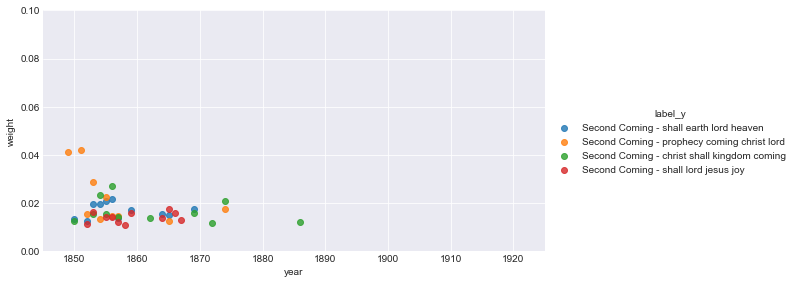

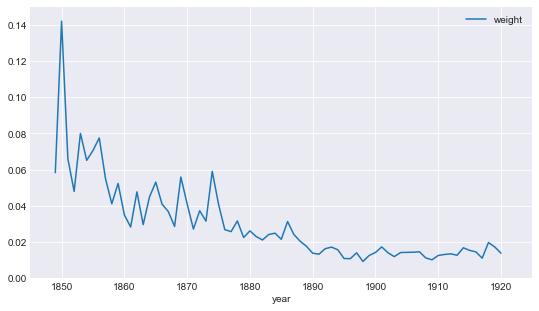

In [227]:
second_coming = [199, 182, 117, 92]
plot_topic_subset(merged, second_coming)
sum_all_topic_values(yearlyAll, second_coming)

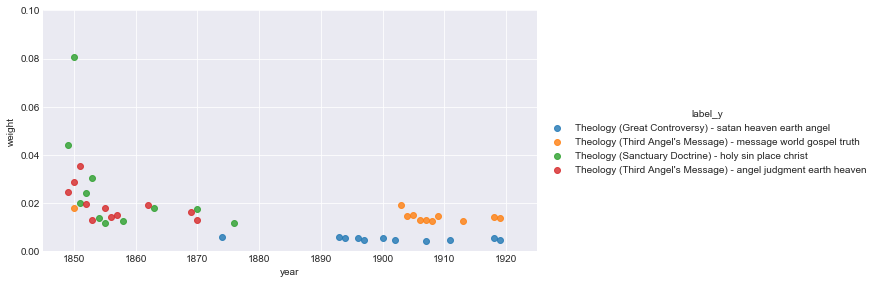

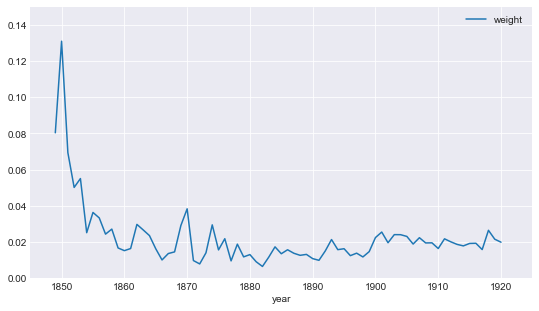

In [228]:
theology = [33, 51, 145, 170]
plot_topic_subset(merged, theology)
sum_all_topic_values(yearlyAll, theology)

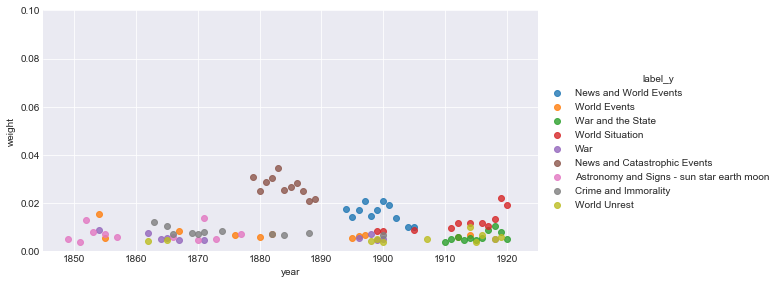

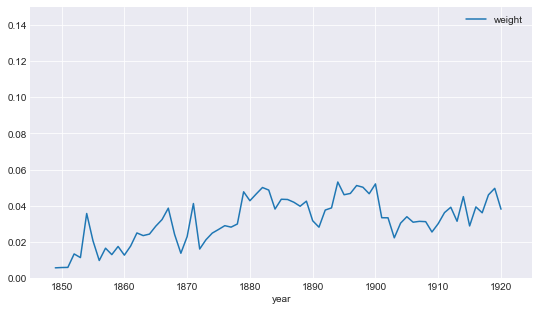

In [229]:
world_events = [163, 39, 27, 17, 96, 141, 100, 75, 30]
plot_topic_subset(merged, world_events)
sum_all_topic_values(yearlyAll, world_events)

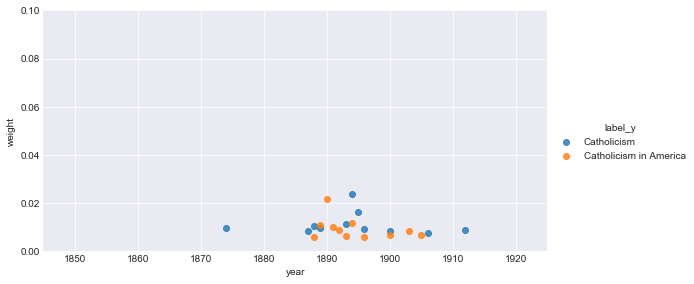

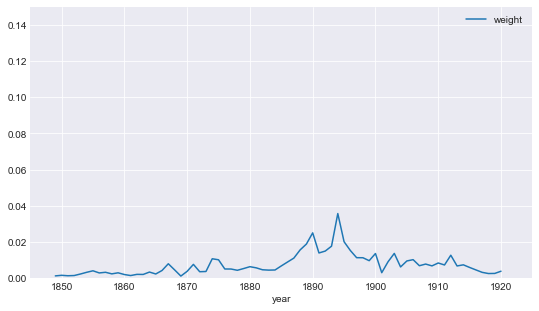

In [230]:
catholicism = [221, 158]
plot_topic_subset(merged, catholicism)
sum_all_topic_values(yearlyAll, catholicism)